In [1]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import sys
sys.path.insert(0, '/home/phyto/CoccoData/coccodata/')
from regression import regression_simulation
from functions import add_months_since_solstice
from plots import multipage_plots, sd_simulations

In [ ]:
p = sd_simulations
p.plot()

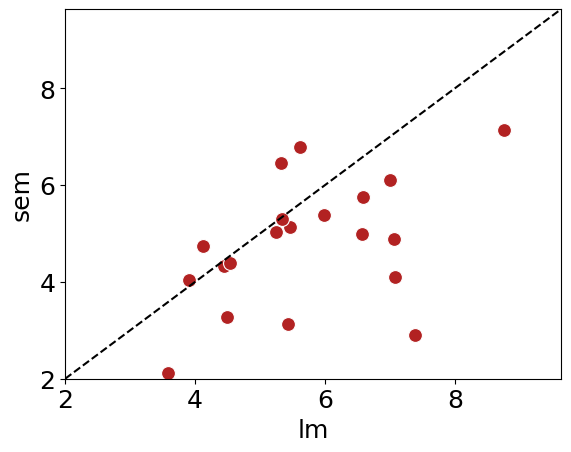

In [3]:
#plot SEM vs LM size estimates:

In [ ]:
#plot POC regression:
d = pd.read_csv("/home/phyto/CoccoData/data/unprocessed/poulton2024.csv")
Y_train = d['pg poc']
X_train = d['volume']

X_train = np.log(X_train)
X_predict = np.log(X_train)

r = regression_simulation(X_train, Y_train)
r.plot_fit(x=X_train, y=Y_train, ylab="POC", title= "Allometric GLM for POC")
r.return_performance()

In [ ]:
#plot PIC regression:
d = pd.read_csv("/home/phyto/CoccoData/data/allometry/sheward2024.csv")
d = pd.get_dummies(d, columns=["phase"], dtype=float)
X_train = d[["volume", "phase_HET", "phase_HOL"]].astype(float)
Y_train = d['pg pic']

r = regression_simulation(X_train, Y_train=Y_train, link= sm.families.links.Identity())
r.plot_fit_PIC()

In [ ]:
#make a supplemental pdf with plots of every spp


d = pd.read_csv("/home/phyto/CoccoData/gridded_abundances.csv")
d = add_months_since_solstice(d)


ds = pd.read_csv("/home/phyto/CoccoData/data/species_list.csv")
ds = ds.sort_values(by=['species'])
#species_list = list(ds['species'])[0:6]
species_list = list(ds['species'])

m = multipage_plots(ds=d, species_list=species_list, n_page=6, out_path='/home/phyto/library.pdf')
m.export_pdf()
